In [3]:
from api_caller import call_api
from public_data.api_caller import save_data
import pandas as pd
import os
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

os.chdir(os.getcwd())
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [4]:
df = pd.read_json('auction_price_onion_2020_2021.json')

In [9]:
df['delngDe'] = pd.to_datetime(df['delngDe'], format='%Y%m%d')
df = df.sort_values(['delngDe'], ascending=[1])
df = df.rename({
    'aucSeCode':'경매구분코드',
    'aucSeNm':'경매구분코드명',
    'catgoryNm':'부류명',
    'cprInsttCode':'도매시장법인코드',
    'cprMtcCode':'산지코드',
    'prUsePrdlstCode':'법인사용품목코드',
    'cprUsePrdlstNm':'법인사용품목명',
    'delngDe':'경락일자',
    'delngPrut':'거래단위량',
    'delngQy':'거래량',
    'insttNm':'도매시장법인명',
    'ledgNo':'경매원표번호',
    'rnum':'한페이지결과수',
    'sbidPric':'거래가격',
    'shipmntSeCode':'출하구분코드',
    'shipmntSeNm':'출하구분명',
    'sleSeqn':'일련번호','stdFrmlcNewCode':'포장상태코드',
    'stdFrmlcNewNm':'포장상태명',
    'stdMtcNewNm':'산지명',
    'stdPrdlstCode':'품목코드',
    'stdPrdlstNm':'품목명',
    'stdSpciesCode':'품종코드',
    'stdSpciesNm':'품종명',
    'stdQlityNewCode':'등급코드',
    'stdQlityNewNm':'등급명',
    'stdUnitNewCode':'거래규격단위코드',
    'stdUnitNewNm':'거래단위명',
    'whsalMrktCode':'도매시장코드',
    'whsalMrktNm':'도매시장명',
    'cprMtcNm':'산지명2',
    'sbidTime':'경매시간'},
    axis='columns')


In [10]:
df.head()

KeyError: 'delngDe'

In [12]:
df = df[['경락일자',
         '거래량',
         '거래가격','거래규격단위코드', '거래단위명', '등급명']]

,경매구분코드,경매구분코드명,catgoryCode,catgoryNewCode,catgoryNewNm,부류명,도매시장법인코드,cprInsttNewCode,산지코드,산지명2,경락일자,거래단위량,거래량,insttNewNm,도매시장법인명,경매원표번호,한페이지결과수,거래가격,경매시간,일련번호,포장상태코드,포장상태명,stdMgNewCode,stdMgNewNm,stdMtcNewCode,산지명,품목코드,stdPrdlstNewCode,stdPrdlstNewNm,품목명,등급코드,등급명,품종코드,stdSpciesNewCode,stdSpciesNewNm,품종명,거래규격단위코드,거래단위명,도매시장코드,whsalMrktNewCode,whsalMrktNewNm,도매시장명,cprUsePrdlstCode,법인사용품목명,출하구분코드,출하구분명
275112,1,경매,12,12,조미채소류,조미채소류,38010102,6051105,641465,NaN,2020-01-02,1.1,106,농협창원(공),농협창원(공),000000000000107,289,1850,NaN,00020,1ZZ,기타,1ZZ,기타,51100,경상남도 창원시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,5201,대파,2.0,계통
275085,1,경매,12,12,조미채소류,조미채소류,38010102,6051105,641465,NaN,2020-01-02,1.2,100,농협창원(공),농협창원(공),000000000000101,262,1750,NaN,00010,1ZZ,기타,1ZZ,기타,51100,경상남도 창원시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,5201,대파,2.0,계통
275084,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,261,1900,2020-01-02 05:14:27,00005,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275083,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,260,1900,2020-01-02 05:14:21,00004,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별
275082,1,경매,12,12,조미채소류,조미채소류,38010101,6051115,627834,NaN,2020-01-02,1.2,100,창원청과,창원청과,2215,259,1850,2020-01-02 05:14:17,00003,1ZZ,기타,1ZZ,기타,50400,경상남도 밀양시,1202,1202,대파,대파,11,특,120201,120201,대파(일반),대파(일반),12,kg,380101,1051102,창원팔용농산물도매시장,창원팔용도매시장,23801,파,3.0,개별


In [13]:
df
df = df.set_index('경락일자')


In [15]:
rc('font', family='AppleGothic')

# plt.style.use('default')
plt.style.use('ggplot')
# plt.style.use('dark_background')

fig, ax1 = plt.subplots()
plt.title('2020.1 ~ 2021.3 거래량과 가격 평균')
ax2 = ax1.twinx()
fig.autofmt_xdate()
gr1 = df[['거래량', '거래가격']].groupby(pd.Grouper(freq='m'))
gr1.sum()['거래량'].plot(kind='line', ax=ax1, c='g', label='거래량')
gr1.mean()['거래가격'].plot(kind='line', ax=ax2, c='deeppink', label='평균거래가격')
ax1.legend(bbox_to_anchor =(0.65, 1.25), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.25), ncol = 2)

KeyError: "None of ['경락일자'] are in the columns"

eeee


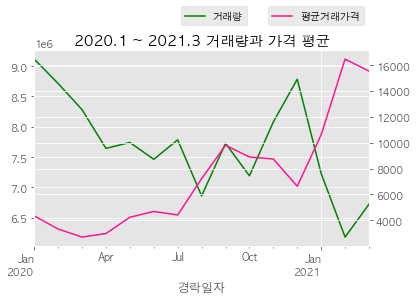

In [18]:
df2020 = df.loc['2020-01-01':'2020-03-31']
df2021 = df.loc['2021-01-01':'2021-03-31']

y = [int(df2020['거래량'].sum()),
 int(df2021['거래량'].sum())]
x = [2020, 2021]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title('2020, 2021 1~3월 거래량')
plt.xticks([2020, 2021], labels=['2020.1to3', '2021.1to3'])
plt.bar(x, y)

In [2]:
print('eeefffe')

eeefffe
